<a href="https://colab.research.google.com/github/Charlee0616/Data-Mining/blob/main/Studentperformancefactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/Charlee0616/Data-Mining/raw/main/StudentPerformanceFactors.csv")

In [3]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

# **Part 1: Attribute Selection Method**

In [4]:
import math

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df["School_Type"].unique()

array(['Public', 'Private'], dtype=object)

In [8]:
features = df.columns[ df.columns != "School_Type" ]

In [9]:
features

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
df.columns[0:(len(df.columns)-1)]

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [11]:
target = "School_Type"

In [12]:
attribute= "Parental_Education_Level"

In [13]:
vals = df[ attribute].unique()
#vals.sort()
vals

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [14]:
props = df[ df[attribute] == vals[1] ][target].value_counts( normalize=True )
props

,proportion
School_Type,
Public,0.703871
Private,0.296129


In [15]:
entropy = 0
for p in props.array:
  entropy = entropy - p*math.log2(p)
entropy

0.8765070536434967

In [16]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props.iloc[i]*math.log2( props.iloc[i] )
entropy

0.8765070536434967

In [17]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

0.8750164153121978

In [18]:
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Part 2: Decision Tree**

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [21]:
train_set.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [22]:
test_set.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [23]:
train_set=train_set[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "Learning_Disabilities","Parental_Education_Level", "School_Type"]]

In [24]:
test_set=test_set[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "Learning_Disabilities","Parental_Education_Level", "School_Type"]]

In [25]:
X_train = train_set[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "Learning_Disabilities","Parental_Education_Level"]]
y_train = train_set["School_Type"]

In [26]:
X_test = test_set[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "Learning_Disabilities","Parental_Education_Level", "School_Type"]]
y_test = test_set["School_Type"]

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [29]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [30]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [31]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [32]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.68684957, 0.69157994, 0.69820246, 0.69820246, 0.70009461])

In [33]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Hours_Studied', 'Attendance'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality',
       'Learning_Disabilities', 'Parental_Education_Level'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [34]:
predictions = pipeline.predict( X_test )

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
cm = confusion_matrix( y_test, predictions )

In [37]:
cm

array([[  7, 414],
       [ 15, 886]])

[Text(0.5, 0.875, 'x[1] <= 1.262\ngini = 0.42\nsamples = 5285\nvalue = [1588.0, 3697.0]'),
 Text(0.25, 0.625, 'x[14] <= 0.5\ngini = 0.415\nsamples = 4553\nvalue = [1337, 3216]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[12] <= 0.5\ngini = 0.404\nsamples = 2720\nvalue = [765, 1955]'),
 Text(0.0625, 0.125, 'gini = 0.45\nsamples = 190\nvalue = [65.0, 125.0]'),
 Text(0.1875, 0.125, 'gini = 0.4\nsamples = 2530\nvalue = [700, 1830]'),
 Text(0.375, 0.375, 'x[0] <= 0.921\ngini = 0.429\nsamples = 1833\nvalue = [572, 1261]'),
 Text(0.3125, 0.125, 'gini = 0.417\nsamples = 1490\nvalue = [442, 1048]'),
 Text(0.4375, 0.125, 'gini = 0.471\nsamples = 343\nvalue = [130, 213]'),
 Text(0.75, 0.625, 'x[15] <= 0.5\ngini = 0.451\nsamples = 732\nvalue = [251, 481]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 0.5\ngini = 0.422\nsamples = 436\nvalue = [132, 304]'),
 Text(0.5625, 0.125, 'gini = 0.44\nsamples = 358\nvalue = [117, 241]'),
 Text(0.6875, 0.125, 'gini = 0.311\nsamples =

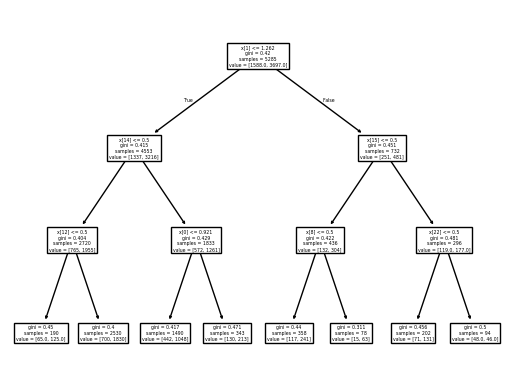

In [38]:
plot_tree( pipeline.named_steps['clf'])